Transaction Matrix (First few rows):
   tropical fruit  whole milk  pip fruit  other vegetables  rolls/buns  \
0           False        True      False             False       False   
1           False        True      False             False       False   
2           False       False      False             False       False   
3           False       False      False             False       False   
4           False       False      False             False       False   

   pot plants  citrus fruit   beef  frankfurter  chicken  ...  flower (seeds)  \
0       False         False  False        False    False  ...           False   
1       False         False  False        False    False  ...           False   
2       False         False  False        False    False  ...           False   
3       False         False  False        False    False  ...           False   
4       False         False  False        False    False  ...           False   

    rice    tea  salad dressing

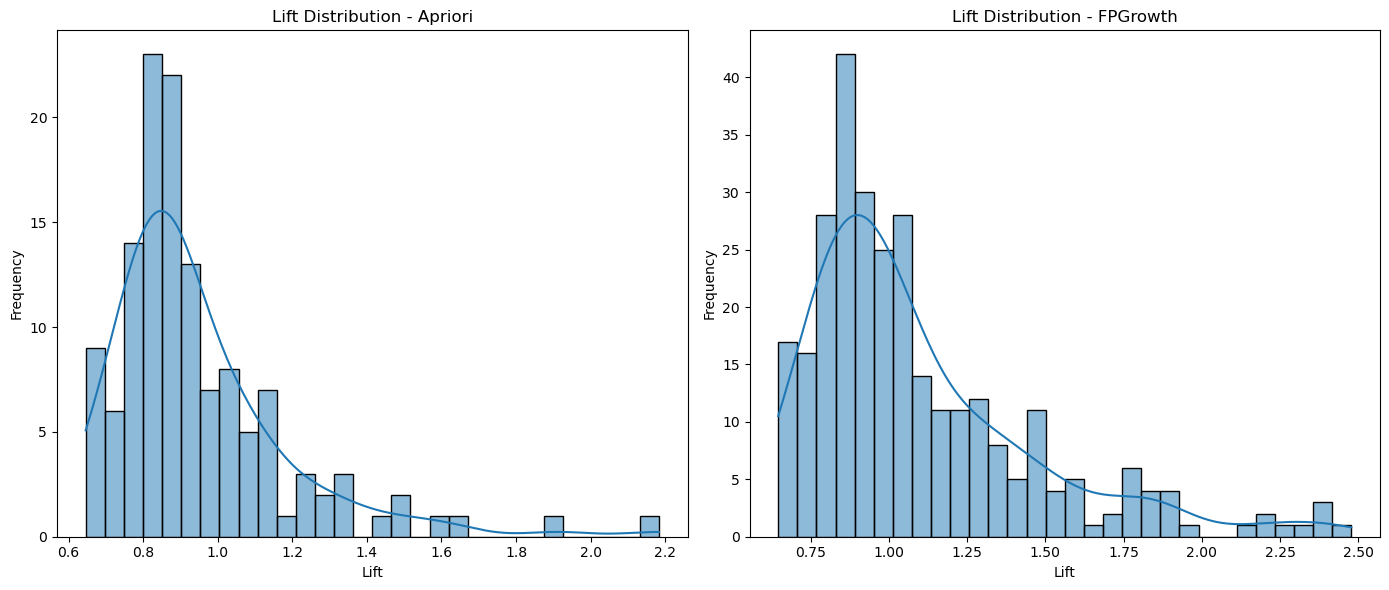

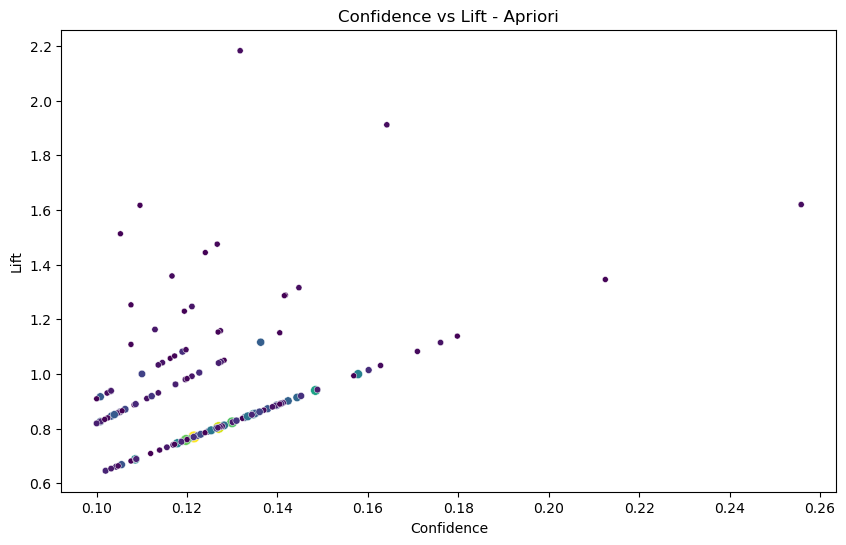

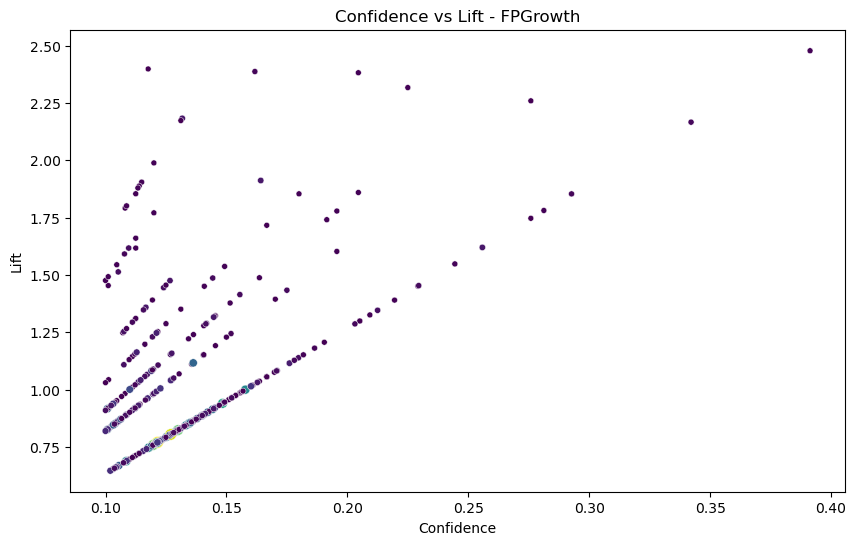

Strong Rules (Apriori):
           antecedents   consequents  antecedent support  consequent support  \
124  (yogurt, sausage)  (whole milk)            0.005748            0.157923   

     support  confidence      lift  representativity  leverage  conviction  \
124  0.00147    0.255814  1.619866               1.0  0.000563    1.131541   

     zhangs_metric   jaccard  certainty  kulczynski  
124       0.384877  0.009065    0.11625    0.132562  
Strong Rules (FPGrowth):
                          antecedents         consequents  antecedent support  \
9                   (yogurt, sausage)        (whole milk)            0.005748   
89          (white bread, rolls/buns)        (whole milk)            0.002139   
91       (yogurt, whipped/sour cream)        (rolls/buns)            0.002941   
92   (whipped/sour cream, rolls/buns)            (yogurt)            0.002941   
144          (shopping bags, sausage)  (other vegetables)            0.001938   
155                        (softener)  

In [118]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("groceries.csv", encoding='latin1')

data = data.drop_duplicates(subset=['Member_number', 'Date', 'itemDescription'])

transactions = data.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()

unique_items = data['itemDescription'].unique()

transactions_matrix = pd.DataFrame(0, index=range(len(transactions)), columns=unique_items)

for idx, transaction in enumerate(transactions['itemDescription']):
    for item in transaction:
        transactions_matrix.loc[idx, item] = 1

transactions_matrix = transactions_matrix.astype(bool)

print("Transaction Matrix (First few rows):")
print(transactions_matrix.head())

# -------------------- APRIORI ALGORITHM --------------------

frequent_itemsets_apriori = apriori(transactions_matrix, min_support=0.001, use_colnames=True)

print("Frequent Itemsets (Top 10) - Apriori:")
print(frequent_itemsets_apriori.head(10))

rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.1, num_itemsets=2)

print("Association Rules (Top 10) - Apriori:")
print(rules_apriori.head(10))


# -------------------- FPGROWTH ALGORITHM --------------------

frequent_itemsets_fpgrowth = fpgrowth(transactions_matrix, min_support=0.0005, use_colnames=True)

print("Frequent Itemsets (Top 10) - FPGrowth:")
print(frequent_itemsets_fpgrowth.head(10))

rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=0.1, num_itemsets=2)

print("Association Rules (Top 10) - FPGrowth:")
print(rules_fpgrowth.head(10))

# -------------------- COMPARING APRIORI & FPGROWTH --------------------

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(rules_apriori['lift'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Lift Distribution - Apriori")
axes[0].set_xlabel("Lift")
axes[0].set_ylabel("Frequency")

sns.histplot(rules_fpgrowth['lift'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Lift Distribution - FPGrowth")
axes[1].set_xlabel("Lift")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# -------------------- SCATTER PLOTS OF CONFIDENCE vs LIFT --------------------

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules_apriori, x='confidence', y='lift', size='support', hue='support', palette='viridis', legend=False)
plt.title("Confidence vs Lift - Apriori")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules_fpgrowth, x='confidence', y='lift', size='support', hue='support', palette='viridis', legend=False)
plt.title("Confidence vs Lift - FPGrowth")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.show()

# -------------------- FILTER STRONG RULES --------------------

strong_rules_apriori = rules_apriori[(rules_apriori['confidence'] > 0.2) & (rules_apriori['lift'] > 1.5)]
strong_rules_fpgrowth = rules_fpgrowth[(rules_fpgrowth['confidence'] > 0.2) & (rules_fpgrowth['lift'] > 1.5)]

print("Strong Rules (Apriori):")
print(strong_rules_apriori)

print("Strong Rules (FPGrowth):")
print(strong_rules_fpgrowth)
